# Inteligência Artificial Aplicada a Finanças

### Projeto 8 - Análise de Portfólio de Fundos de Hedge

## Definindo o Problema

Leia o manual em pdf no Capítulo 11 do curso.

## Fonte de Dados

Leia o manual em pdf no Capítulo 11 do curso.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
%matplotlib inline

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas: 1.2.4
numpy : 1.19.5



## Carregando e Limpando os Dados

### Dataset 1 - Whale Returns 

Dados de retorno de Fundos de Hedge.

In [5]:
# Caminho para o arquivo csv
arquivo_csv_dataset1 = Path("dados/dataset1_whale_returns.csv")

In [6]:
# Carrega o dataset
df_whale_returns = pd.read_csv(arquivo_csv_dataset1, 
                               index_col = "Date", 
                               parse_dates = True, 
                               infer_datetime_format = True)

In [7]:
# Ordena os dados
df_whale_returns.sort_index(ascending = True, inplace = True)

In [8]:
# Shape
df_whale_returns.shape

(1060, 4)

In [9]:
# Visualiza
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [10]:
# Verifica valores ausentes
print(df_whale_returns.isnull().sum())
print(df_whale_returns[df_whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [11]:
# Drop dos valores ausentes
df_whale_returns.dropna(inplace = True)
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Dataset 2 - Algorithmic Daily Returns

Dados de retorno de simulação de investimento feita por algoritmo.

In [12]:
# Arquivo csv
arquivo_csv_dataset2 = Path("dados/dataset2_algo_returns.csv")

In [13]:
# Carrega o dataset
df_algo_returns = pd.read_csv(arquivo_csv_dataset2, 
                              index_col = "Date", 
                              parse_dates = True, 
                              infer_datetime_format = True)

In [14]:
# Ordena os dados
df_algo_returns.sort_index(ascending = True, inplace = True)

In [15]:
# Shape
df_algo_returns.shape

(1241, 2)

In [16]:
# Visualiza
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [17]:
# Visualiza
df_algo_returns.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [18]:
# Verifica valores ausentes
print(df_algo_returns.isnull().sum())
print(df_algo_returns[df_algo_returns.isnull().any(axis = 1)])

Algo 1    0
Algo 2    6
dtype: int64
              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
2014-06-04 -0.001838     NaN


In [19]:
# Drop dos valores ausentes
df_algo_returns.dropna(inplace = True)
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

### Dataset 3 - S&P 500 Returns

Retorno diário do índice S&P 500. O Standard and Poor's 500, ou simplesmente S&P 500, é um índice do mercado de ações que acompanha 500 grandes empresas listadas nas bolsas de valores dos Estados Unidos. É um dos índices de ações mais comumente seguidos.

In [20]:
# Arquivo csv
arquivo_csv_dataset3 = Path("dados/dataset3_sp500_history.csv")

In [21]:
# Carrega o dataset
df_sp500_history = pd.read_csv(arquivo_csv_dataset3, 
                               index_col = "Date", 
                               parse_dates = True, 
                               infer_datetime_format = True)

In [22]:
# Ordena os dados
df_sp500_history.sort_index(ascending = True, inplace = True)

In [23]:
# Shape
df_sp500_history.shape

(1649, 1)

In [24]:
# Visualiza
df_sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [25]:
# Verificando os tipos de dados
df_sp500_history.dtypes

Close    object
dtype: object

In [26]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
# Ajustando o tipo dos dados
df_sp500_history["Close"] = df_sp500_history["Close"].str.replace('$', ' ').astype('float')
print(df_sp500_history.dtypes)
df_sp500_history.head()

Close    float64
dtype: object


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [28]:
# Calculate Daily Returns
df_sp500_daily_returns = df_sp500_history.pct_change()
df_sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [29]:
# Drop de valores ausentes
print(df_sp500_daily_returns.isnull().sum())
df_sp500_daily_returns.dropna(inplace = True)
print(df_sp500_daily_returns.isnull().sum())

Close    1
dtype: int64
Close    0
dtype: int64


In [30]:
# Renomeia a coluna
df_sp500_daily_returns.columns = ["S&P 500"]
df_sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combinando os Dataframes

In [31]:
df_whale_returns.shape

(1059, 4)

In [32]:
df_algo_returns.shape

(1235, 2)

In [33]:
df_sp500_daily_returns.shape

(1648, 1)

In [34]:
# Concatenando os dataframes
df_daily_returns = pd.concat([df_whale_returns, df_algo_returns, df_sp500_daily_returns], 
                             axis = "columns", 
                             join = "inner")

In [35]:
# Ordena os dados
df_daily_returns.sort_index(inplace = True)

In [36]:
# Shape
df_daily_returns.shape

(1043, 7)

In [37]:
# Visualiza
df_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Análise de Portfólio

## Performance

Calcula os retornos diários e o retorno acumulado. Algum portfólio supera o S&P 500?

<AxesSubplot:xlabel='Date'>

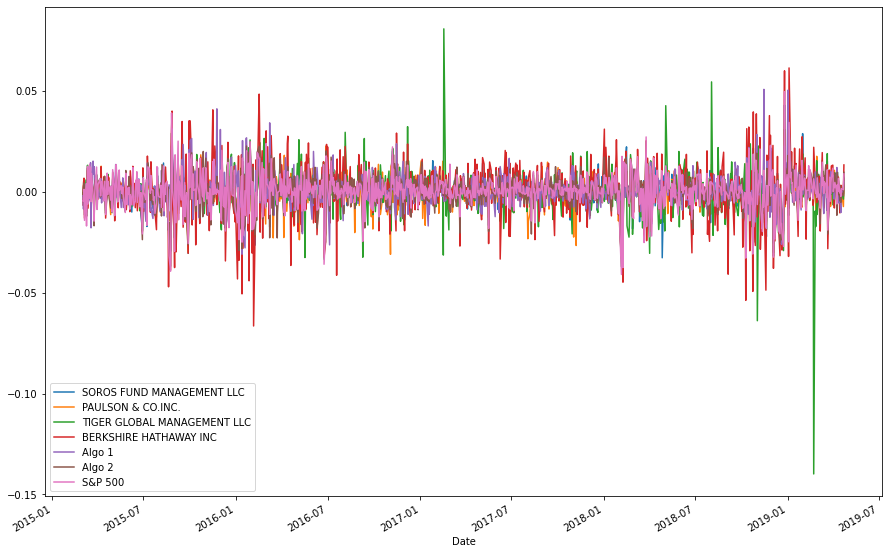

In [38]:
# Plot dos retornos diários
df_daily_returns.plot(figsize = (15,10))

<AxesSubplot:xlabel='Date'>

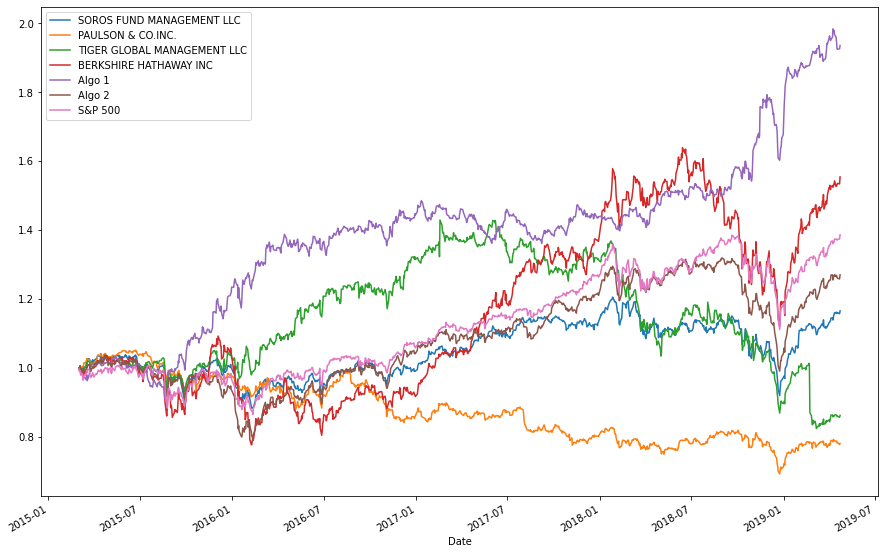

In [39]:
# Plot do retorno acumulado
df_cum = df_daily_returns.cumsum(axis = 0, skipna = True)
df_cum = (1 + df_daily_returns).cumprod()
df_cum.plot(figsize = (15,10))

## Análise de Risco

Determina o _risco_ de cada portfólio:

1. Criamos um gráfico de caixa (boxplot) para cada portfólio.
2. Calculamos o desvio padrão para todas as carteiras.
4. Determinamos quais carteiras são mais arriscadas do que o S&P 500.
5. Calculamos o Desvio Padrão Anualizado.

> Quais portfólios são mais arriscados do que o S&P 500?

In [40]:
# Colunas
df_daily_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500'],
      dtype='object')

<AxesSubplot:>

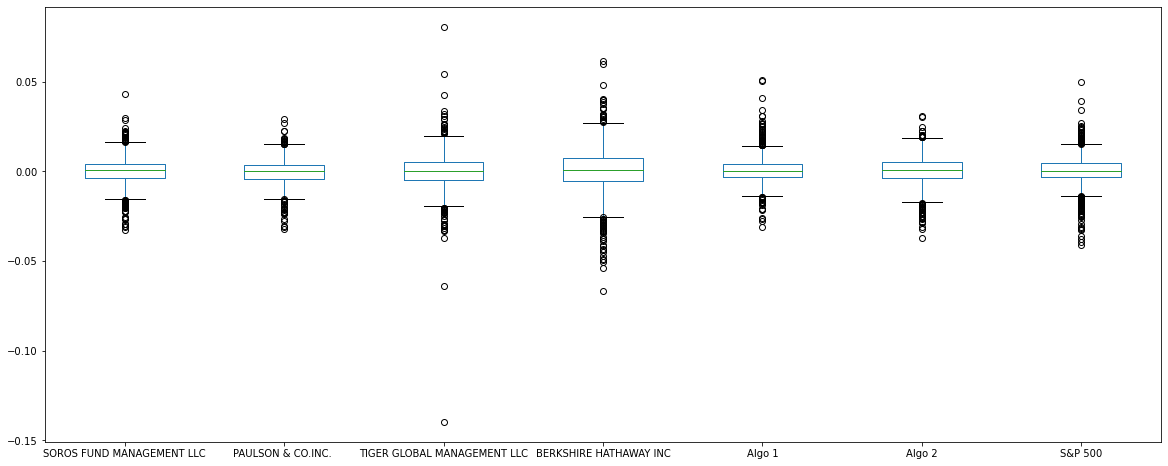

In [41]:
# Gráfico de caixa para mostrar visualmente o risco
df_daily_returns.plot(kind = "box", figsize = (20, 8))

In [42]:
# Desvio padrão diário de cada portfólio 
df_daily_returns_std = pd.DataFrame(df_daily_returns.std())
df_daily_returns_std.columns = ["STD"]
df_daily_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [43]:
# Quais portfólios são mais arriscados do que o S&P 500?
risco = df_daily_returns_std.loc[df_daily_returns_std["STD"] > df_daily_returns_std.loc["S&P 500", "STD"]]
risco

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [44]:
# Calcula o desvio padrão anualizado (252 dias de pregão na bolsa de valores)
annualized_df_daily_returns_std = df_daily_returns_std * np.sqrt(252)
annualized_df_daily_returns_std.head()

,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967


---

## Rolling Statistics (Estatísticas Móveis)


O risco muda com o tempo. Analisaremos as estatísticas móveis para melhor compreender o risco.

1. Traçamos o desvio padrão móvel das várias carteiras junto com o desvio padrão móvel do S&P 500 (consideramos uma janela de 21 dias). O risco aumenta para cada uma das carteiras ao mesmo tempo que aumenta o risco no S&P?

2. Construaímos uma tabela de correlação para os retornos. Quais retornos são mais parecidos com o S&P?

3. Escolhemos um portfólio e traçamos um beta contínuo entre os retornos desse portfólio e os retornos do S&P 500. O portfólio parece sensível a movimentos no S&P 500?

4. Uma forma alternativa de calcular uma janela móvel é obter a média móvel exponencialmente ponderada. É como uma média de janela móvel, mas atribui maior importância às observações mais recentes. Vamos calcular e comparar os resultados.

<AxesSubplot:xlabel='Date'>

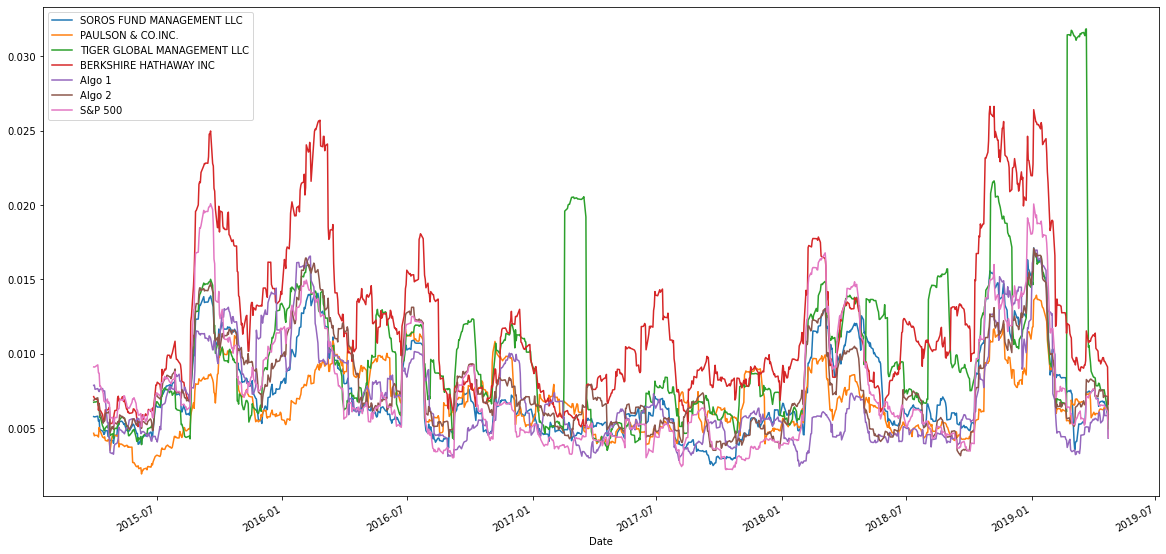

In [45]:
# Calcular e representar graficamente o desvio padrão móvel para o S&P 500 e 
# carteiras dos fundos de hedge usando uma janela de 21 dias de negociação.
df_daily_returns.rolling(window = 21).std().plot(figsize = (20, 10))

In [46]:
# Tabela de correlação
correlation = df_daily_returns.corr()
print("Algo 2 tem a maior correlação com o S&P 500")
correlation

Algo 2 tem a maior correlação com o S&P 500


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:xlabel='Date'>

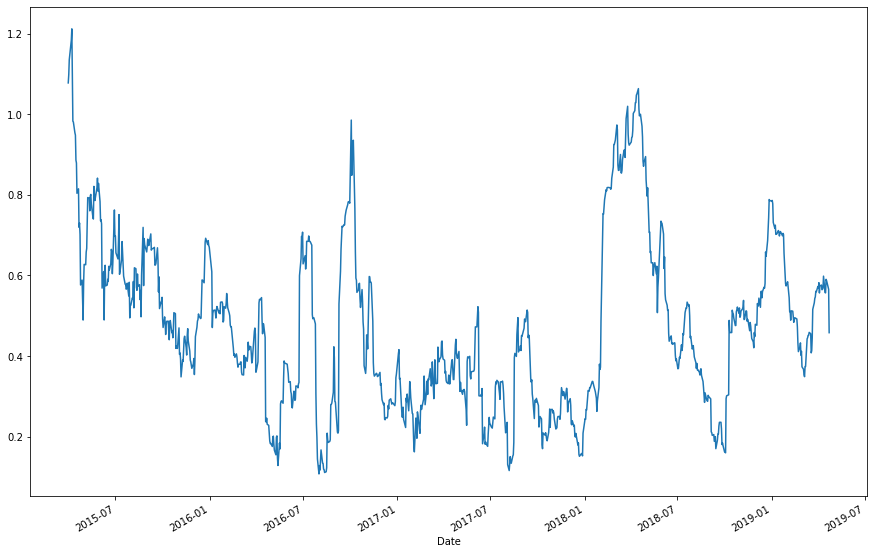

In [47]:
# Calcula o Beta para um único portfólio em comparação com o S&P 500
covariance_berkshire = df_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window = 21).cov(df_daily_returns["S&P 500"])
variance_berkshire = df_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window = 21).var()
beta_berkshire = covariance_berkshire / variance_berkshire
beta_berkshire.plot(kind = 'line', figsize = ( 15, 10))

<AxesSubplot:xlabel='Date'>

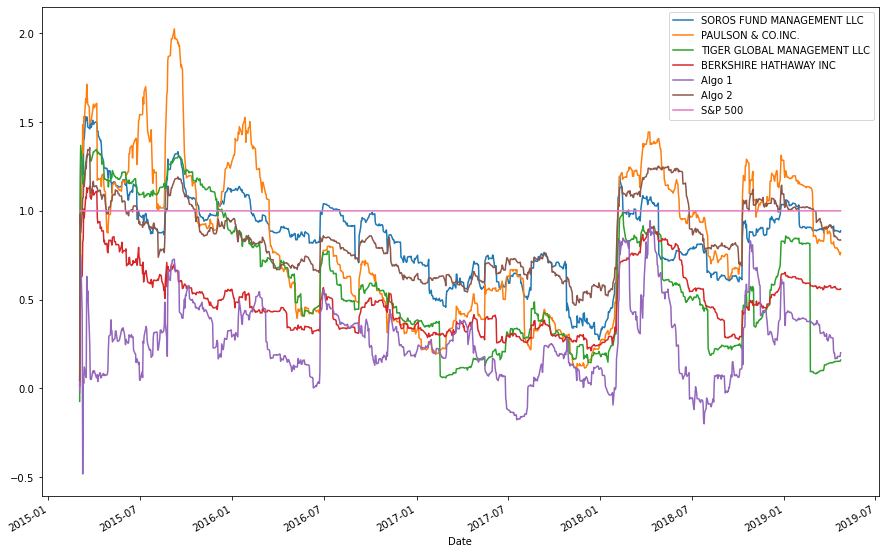

In [48]:
# Calcula uma janela móvel usando a média móvel exponencialmente ponderada
covariance_daily_exponential = df_daily_returns.ewm(halflife = 21).cov(df_daily_returns["S&P 500"])
variance_daily_exponential = df_daily_returns.ewm(halflife = 21).var()
beta_daily_exponential = covariance_daily_exponential / variance_daily_exponential
beta_daily_exponential.plot(kind = "line", figsize = (15, 10))

## Sharpe Ratios

Na realidade, os gestores de investimentos e seus investidores institucionais olham para a relação retorno-risco, e não apenas para os retornos isoladamente. (Afinal, se você puder investir em uma de duas carteiras, e cada uma oferece o mesmo retorno de 10%, mas uma oferece menor risco, você ecolheria essa, certo?)

1. Usando os retornos diários, calculamos e visualizamos as taxas de Sharpe usando um gráfico de barras.
2. Determinamos se as estratégias algorítmicas superam o mercado (S&P 500) e os portfólios dos fundos de hedge.

Geralmente, quanto maior o valor do índice de Sharpe, mais atraente é o retorno ajustado ao risco.

In [49]:
# Calcular Sharpe Ratios anualizados
sharpe_ratios = (df_daily_returns.mean() * 252) / (df_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

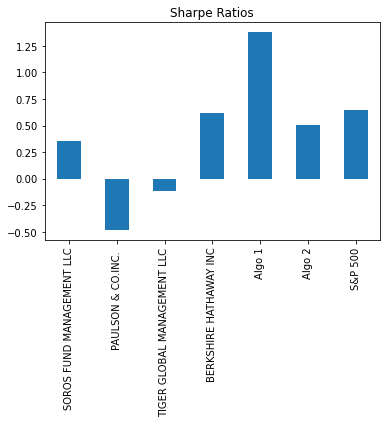

In [50]:
# Sharpe ratios
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")

Com base nessa métrica de desempenho, nossas estratégias de algoritmo superam o desempenho dos demais fundos.

## Criando Nosso Próprio Portfólio e Comparando com o Retorno de Fundos de Hedge

Nesta seção, vamos construir nosso próprio portfólio de ações, calcular os retornos e comparar os resultados com os Portfólios dos fundos de hedge e o S&P 500.

> Vamos carregar os dados das empresas escolhidas para nosso portfólio.

In [51]:
# Dados de ações da AMD
AMD = Path("dados/dataset4_AMD.csv")
amd_history = pd.read_csv(AMD, index_col = "Date", parse_dates = True, infer_datetime_format = True)
amd_history.rename(columns = {"Close":"AMD"}, inplace = True)
amd_history.sort_index(ascending = True, inplace = True)
amd_history.head()

,AMD
Date,
2017-10-17,14.16
2017-10-18,14.07
2017-10-19,13.95
2017-10-20,13.81
2017-10-23,14.10


In [52]:
# Dados de ações da Boeing 
BA = Path("dados/dataset5_BA.csv")
ba_history = pd.read_csv(BA, index_col = "Date", parse_dates = True, infer_datetime_format = True)
ba_history.rename(columns = {"Close":"BA"}, inplace = True)
ba_history.sort_index(ascending = True, inplace = True)
ba_history.head()

,BA
Date,
2017-10-17,258.619995
2017-10-18,260.040009
2017-10-19,259.040009
2017-10-20,264.750000
2017-10-23,262.320007


In [53]:
# Dados de ações da Nvidia 
NVDA = Path("dados/dataset6_NVDA.csv")
nvda_history = pd.read_csv(NVDA, index_col = "Date", parse_dates = True, infer_datetime_format = True)
nvda_history.rename(columns = {"Close":"NVDA"}, inplace = True)
nvda_history.sort_index(ascending = True, inplace = True)
nvda_history.head()

,NVDA
Date,
2017-10-17,197.750000
2017-10-18,197.580002
2017-10-19,197.800003
2017-10-20,196.899994
2017-10-23,196.619995


In [54]:
# Dados de ações da Visa 
V = Path("dados/dataset7_V.csv")
v_history = pd.read_csv(V, index_col = "Date", parse_dates = True, infer_datetime_format = True)
v_history.rename(columns = {"Close":"V"}, inplace = True)
v_history.sort_index(ascending = True, inplace = True)
v_history.head()

,V
Date,
2017-10-17,107.540001
2017-10-18,107.800003
2017-10-19,107.019997
2017-10-20,107.550003
2017-10-23,107.529999


In [55]:
# Dados de ações da Walmart 
WMT = Path("dados/dataset8_WMT.csv")
wmt_history = pd.read_csv(WMT, index_col = "Date", parse_dates = True, infer_datetime_format = True)
wmt_history.rename(columns = {"Close":"WMT"}, inplace = True)
wmt_history.sort_index(ascending = True, inplace = True)
wmt_history.head()

,WMT
Date,
2017-10-17,85.980003
2017-10-18,86.220001
2017-10-19,86.400002
2017-10-20,87.440002
2017-10-23,88.650002


In [56]:
# Concatena os dados em um novo dataframe
meu_portfolio = pd.concat([amd_history, ba_history, nvda_history, v_history, wmt_history], 
                         axis = "columns", 
                         join = "inner")

In [57]:
# Ordena e visualiza
meu_portfolio.sort_index(ascending = True, inplace = True)
meu_portfolio.head()

,AMD,BA,NVDA,V,WMT
Date,,,,,
2017-10-17,14.16,258.619995,197.750000,107.540001,85.980003
2017-10-18,14.07,260.040009,197.580002,107.800003,86.220001
2017-10-19,13.95,259.040009,197.800003,107.019997,86.400002
2017-10-20,13.81,264.750000,196.899994,107.550003,87.440002
2017-10-23,14.10,262.320007,196.619995,107.529999,88.650002


In [58]:
# Reset do índice
meu_portfolio.reset_index(level = None, drop = False, inplace = False, col_level = 0, col_fill = "")

,Date,AMD,BA,NVDA,V,WMT
0,2017-10-17,14.160000,258.619995,197.750000,107.540001,85.980003
1,2017-10-18,14.070000,260.040009,197.580002,107.800003,86.220001
2,2017-10-19,13.950000,259.040009,197.800003,107.019997,86.400002
3,2017-10-20,13.810000,264.750000,196.899994,107.550003,87.440002
4,2017-10-23,14.100000,262.320007,196.619995,107.529999,88.650002
...,...,...,...,...,...,...
751,2020-10-12,84.290001,167.350006,569.039978,206.399994,144.250000
752,2020-10-13,85.279999,162.139999,569.929993,204.320007,146.229996
753,2020-10-14,84.209999,163.240005,563.809998,202.199997,143.940002
754,2020-10-15,83.129997,164.240005,558.799988,199.550003,144.529999


In [59]:
# Pivot para que cada coluna de preços represente um símbolo único
sym_portfolio = meu_portfolio.pivot_table(index = "Date")
sym_portfolio.head()

,AMD,BA,NVDA,V,WMT
Date,,,,,
2017-10-17,14.16,258.619995,197.750000,107.540001,85.980003
2017-10-18,14.07,260.040009,197.580002,107.800003,86.220001
2017-10-19,13.95,259.040009,197.800003,107.019997,86.400002
2017-10-20,13.81,264.750000,196.899994,107.550003,87.440002
2017-10-23,14.10,262.320007,196.619995,107.529999,88.650002


In [60]:
# Drop de valores ausentes
sym_portfolio.dropna(inplace = True)
sym_portfolio.head()

,AMD,BA,NVDA,V,WMT
Date,,,,,
2017-10-17,14.16,258.619995,197.750000,107.540001,85.980003
2017-10-18,14.07,260.040009,197.580002,107.800003,86.220001
2017-10-19,13.95,259.040009,197.800003,107.019997,86.400002
2017-10-20,13.81,264.750000,196.899994,107.550003,87.440002
2017-10-23,14.10,262.320007,196.619995,107.529999,88.650002


In [61]:
sym_portfolio.shape

(756, 5)

> Calculamos os retornos ponderados para a carteira, assumindo um número igual de cotas para cada ação.

In [62]:
# Calculamos os retornos ponderados do portfólio
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
meu_portfolio = sym_portfolio.dot(weights)
meu_portfolio_returns = meu_portfolio.pct_change()
meu_portfolio_returns.dropna(inplace = True)
meu_portfolio_returns.head()

Date
2017-10-18    0.002500
2017-10-19   -0.002253
2017-10-20    0.009395
2017-10-23   -0.001835
2017-10-24    0.009115
dtype: float64

> Join do nosso portfólio aos retornos dos demais portfólios.

In [63]:
# Adiciona nosso portfólio "personalizado" ao dataframe maior de retornos de fundos
portfolio_returns = pd.concat((meu_portfolio_returns, df_daily_returns), axis = "columns", join = "inner")
portfolio_returns.rename(columns = {0:"Meu Portfolio"}, inplace = True)
portfolio_returns

,Meu Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2017-10-18,0.002500,-0.001167,-0.007151,-0.002460,0.004949,-0.001652,-0.000138,0.000742
2017-10-19,-0.002253,-0.002063,0.005359,-0.006275,-0.010606,0.000585,-0.001053,0.000328
2017-10-20,0.009395,0.002271,-0.000603,0.004499,0.002820,-0.002531,0.003606,0.005117
2017-10-23,-0.001835,-0.004255,-0.004292,0.002513,-0.008789,-0.004601,-0.005884,-0.003972
2017-10-24,0.009115,-0.004026,-0.001726,0.003547,0.002099,-0.004328,-0.000893,0.001618
...,...,...,...,...,...,...,...,...
2019-04-16,0.012536,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.005946,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001741,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [64]:
# Comparamos apenas as datas em que existem dados de retorno para todas as ações (drop NaNs)
portfolio_returns.dropna(inplace = True)
portfolio_returns

,Meu Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2017-10-18,0.002500,-0.001167,-0.007151,-0.002460,0.004949,-0.001652,-0.000138,0.000742
2017-10-19,-0.002253,-0.002063,0.005359,-0.006275,-0.010606,0.000585,-0.001053,0.000328
2017-10-20,0.009395,0.002271,-0.000603,0.004499,0.002820,-0.002531,0.003606,0.005117
2017-10-23,-0.001835,-0.004255,-0.004292,0.002513,-0.008789,-0.004601,-0.005884,-0.003972
2017-10-24,0.009115,-0.004026,-0.001726,0.003547,0.002099,-0.004328,-0.000893,0.001618
...,...,...,...,...,...,...,...,...
2019-04-16,0.012536,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.005946,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001741,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


> Executamos novamente a análise de desempenho e risco com nosso portfólio para ver como ele se compara aos outros.

In [65]:
# Risco
portfolio_returns_std = pd.DataFrame(portfolio_returns.std())
portfolio_returns_std.columns = ["STD"]
annualized_portfolio_returns_std = portfolio_returns_std * np.sqrt(252)
annualized_portfolio_returns_std.head()

,STD
Meu Portfolio,0.256996
SOROS FUND MANAGEMENT LLC,0.143917
PAULSON & CO.INC.,0.116172
TIGER GLOBAL MANAGEMENT LLC,0.211266
BERKSHIRE HATHAWAY INC,0.223649


<AxesSubplot:xlabel='Date'>

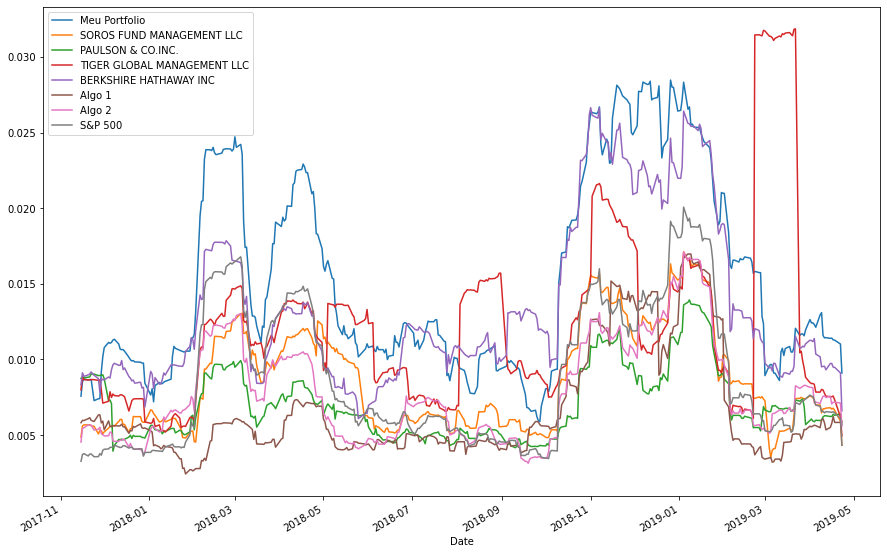

In [66]:
# Estatísticas Móveis
portfolio_returns.rolling(window = 21).std().plot(figsize=(15,10))

In [67]:
# Annualized Sharpe Ratios
new_sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
new_sharpe_ratios

Meu Portfolio                  0.790235
SOROS FUND MANAGEMENT LLC      0.180889
PAULSON & CO.INC.             -0.205104
TIGER GLOBAL MANAGEMENT LLC   -1.140460
BERKSHIRE HATHAWAY INC         0.575400
Algo 1                         1.861298
Algo 2                         0.411675
S&P 500                        0.674151
dtype: float64

Geralmente, quanto maior o valor do índice de Sharpe, mais atraente é o retorno ajustado ao risco.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

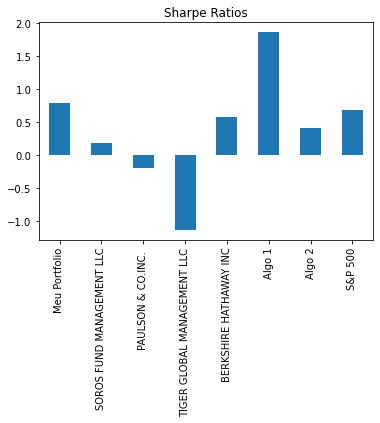

In [68]:
# Visualiza os Sharpe Ratios como um gráfico de barras
new_sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")

In [69]:
# Correlação
new_correlation = portfolio_returns.corr()
print("Algo 2 ainda tem a mais alta correlação com S&P 500")
new_correlation

Algo 2 ainda tem a mais alta correlação com S&P 500


,Meu Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Meu Portfolio,1.000000,0.679664,0.579324,0.403140,0.763582,0.243830,0.723187,0.829311
SOROS FUND MANAGEMENT LLC,0.679664,1.000000,0.751071,0.511691,0.780257,0.326331,0.828155,0.831343
PAULSON & CO.INC.,0.579324,0.751071,1.000000,0.492073,0.626057,0.337278,0.772946,0.748047
TIGER GLOBAL MANAGEMENT LLC,0.403140,0.511691,0.492073,1.000000,0.372517,0.134633,0.479858,0.557858
BERKSHIRE HATHAWAY INC,0.763582,0.780257,0.626057,0.372517,1.000000,0.310652,0.779185,0.830721
Algo 1,0.243830,0.326331,0.337278,0.134633,0.310652,1.000000,0.317405,0.269803
Algo 2,0.723187,0.828155,0.772946,0.479858,0.779185,0.317405,1.000000,0.878185
S&P 500,0.829311,0.831343,0.748047,0.557858,0.830721,0.269803,0.878185,1.000000


<AxesSubplot:xlabel='Date'>

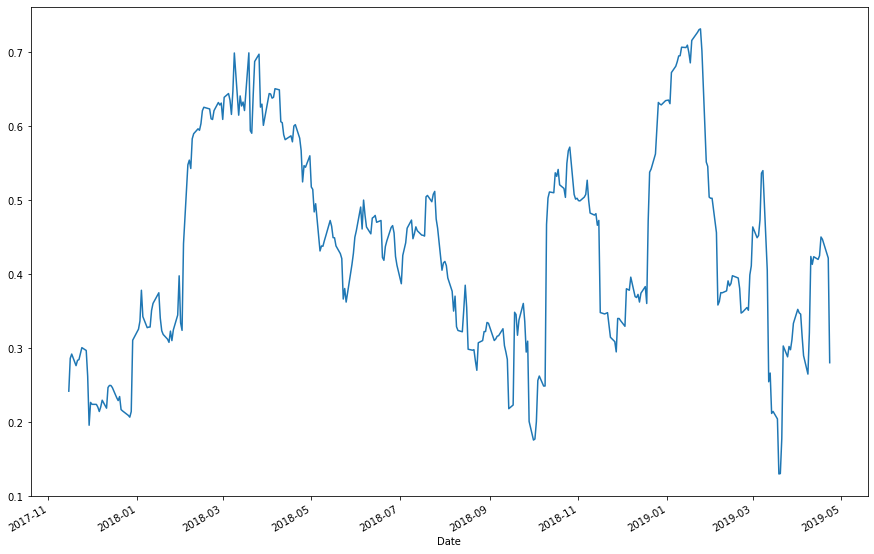

In [70]:
# Beta
cov_portfolio = portfolio_returns["Meu Portfolio"].rolling(window = 21).cov(portfolio_returns["S&P 500"])
var_portfolio = portfolio_returns["Meu Portfolio"].rolling(window = 21).var()
beta_portfolio = cov_portfolio / var_portfolio
beta_portfolio.plot(kind = 'line', figsize = (15, 10))

# Fim